In [1]:
import os
import sys
import requests
from datetime import datetime 
from multiprocessing import Pool
import numpy as  np
import pandas as pd
from pathlib import Path
import pickle
from tqdm import tqdm
from time import time
from typing import Dict, List, Optional
sys.path.append('../')
sys.path.append('../anmodel')
import matplotlib.pyplot as plt
import anmodel
import matplotlib
import scipy
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

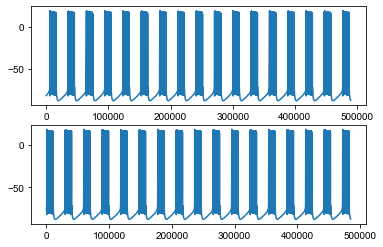

In [11]:
mnnan1=anmodel.models.FNANdmodel()
Sna=pd.read_csv("A.csv")
A=[]
c=1610
A.append(Sna["g_leak"][c]*0.6095)
A.append(Sna["g_leak"][c]*0.3905*0.44)
A.append(Sna["g_leak"][c]*0.3905*0.25)
A.append(Sna["g_leak"][c]*0.3905*0.31)
A.append(Sna['g_nav'][c])
A.append(Sna['g_kvhh'][c])
A.append(Sna['g_kva'][c])
A.append(Sna['g_kvsi'][c])
A.append(Sna['g_cav'][c])
A.append(Sna['g_kca'][c])
A.append(Sna['g_nap'][c])
A.append(Sna['g_kir'][c])
A.append(Sna['g_unav'][c])
A.append(Sna['g_kna'][c])
A.append(Sna['g_ampar'][c])
A.append(Sna['g_nmdar'][c])
A.append(Sna['g_gabar'][c])
A.append(Sna['t_ca'][c])
A.append(Sna['t_na'][c])
A.append(Sna['t_na'][c]*1.5)
A.append(Sna['x_na'][c])
A.append(Sna['y_na'][c])


BBB=['g_lek', 'g_lenana', 'g_lenaca', 'g_lenak', 'g_nav', 'g_kvhh', 'g_kva', 'g_kvsi', 'g_cav', 'g_kca', 'g_nap', 'g_kir', 'g_unav', 'g_kna', 'g_ampar', 'g_nmdar', 'g_gabar', 't_ca', 't_na', 't_k',  'x_na', 'y_na']
dic={key:  val for key, val in zip(BBB,A)}
#new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
new_params=dic

mnnan1.set_params(new_params)
s0,info=mnnan1.run_odeint()
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(s0[9999:,0])
plt.subplot(2,1,2)
plt.plot(s0[14999:,0])

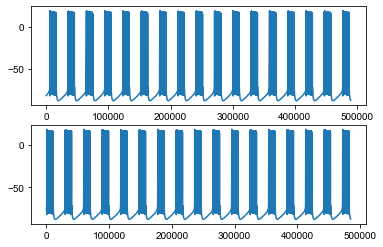

In [12]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(s0[9999:,0])
plt.subplot(2,1,2)
plt.plot(s0[14999:,0])

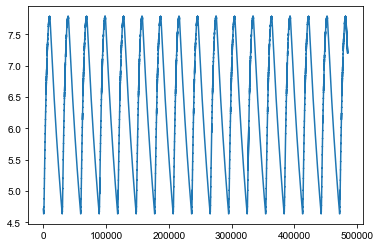

In [13]:
plt.plot(s0[14999:,11])

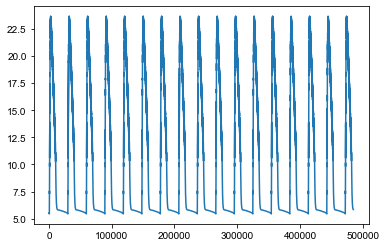

In [14]:
plt.plot(s0[14999:,9])

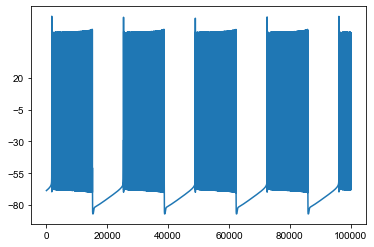

In [9]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[400000:,0])
Z=np.linspace(-80,20, 5)
ax.set_yticks(Z)

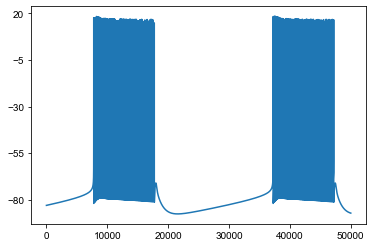

In [16]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[450000:,0])
Z=np.linspace(-80,20, 5)
ax.set_yticks(Z)
plt.savefig("Fig7C1.pdf")

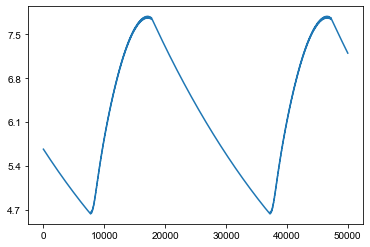

In [22]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[450000:,11])
Z=np.linspace(4.7,7.5, 5)
ax.set_yticks(Z)
plt.savefig("Fig7C2.pdf")

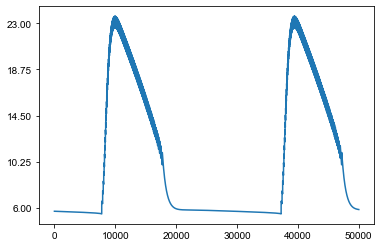

In [23]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[450000:,9])
Z=np.linspace(6,23, 5)
ax.set_yticks(Z)
plt.savefig("Fig7C3.pdf")

In [5]:
new_params

{'g_lek': 0.20096567968100001,
 'g_lenana': 0.056652868060360004,
 'g_lenaca': 0.03218912957975,
 'g_lenak': 0.03991452067889,
 'g_nav': 16.30822041,
 'g_kvhh': 10.25870432,
 'g_kva': 1.283240695,
 'g_kvsi': 0.03662354,
 'g_cav': 6.91280864,
 'g_kca': 0.348312606,
 'g_nap': 0.771027059,
 'g_kir': 0.015722023,
 'g_unav': 0.160859743,
 'g_kna': 11.30617791,
 'g_ampar': 0.192859701,
 'g_nmdar': 0.001702916,
 'g_gabar': 0,
 't_ca': 15.2077103,
 't_na': 1554.41548,
 't_k': 2331.62322,
 'x_na': -10.34090221,
 'y_na': 31.82007669}

In [ ]:
S=pd.read_csv("A.csv")
hh=[541, 396, 430, 1055, 811, 540, 601, 415, 987, 926, 1024, 38, 241, 487, 159, 253, 1052, 287, 668, 359, 802, 634, 196, 149, 747, 856, 65, 100, 818, 647, 279, 804, 866, 585, 278, 718, 163, 984, 505, 869, 1076, 702, 1037, 552, 447, 4, 420, 877, 916, 883]
anan1=anmodel.models.NAN10dmodel()
x=len(S["g_kvhh"])
for j in tqdm(range(50)):
 
    A=[]
    num=hh[j]+1
    A.append(S["g_kvhh"][num])
    A.append(S["g_unav"][num])
    A.append(S["g_kna"][num])

    A.append(S["g_leak"][num]*0.6095)
    A.append(S["g_leak"][num]*0.3905*0.44)
    A.append(S["g_leak"][num]*0.3905*0.25)
    A.append(S["g_leak"][num]*0.3905*0.31)

    A.append(S["t_na"][num])
    A.append(S["x_na"][num])
    A.append(S["y_na"][num])
    A.append(S["g_cav"][num])
    A.append(121)
    A.append(S["t_na"][num]*1.5)
    
    BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_lek', 'g_lenana', 'g_lenaca', 'g_lenak',  't_na', 'x_na', 'y_na', 'g_cav', 't_ca', 't_k']
    dic={key: val for key , val in zip(BBB,A)}
    new_params=dic
    anan1.set_params(new_params)
    s,info=anan1.run_odeint()
    
    fig=plt.figure()
    plt.subplot(2,1,1)
    plt.plot(s[14999:,0])
    plt.title("{}" .format(j))
    plt.subplot(2,1,2)
    plt.plot(s[14999:,3])
    plt.title("{}" .format(j))
    fig.savefig("a{}.png" .format(j))


In [ ]:
hh[12]


In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10dmodel()
num=242

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])

A.append(S["g_leak"][num]*0.6095)
A.append(S["g_leak"][num]*0.3905*0.44)
A.append(S["g_leak"][num]*0.3905*0.25)
A.append(S["g_leak"][num]*0.3905*0.31)

A.append(S["t_na"][num])
A.append(S["x_na"][num])
A.append(S["y_na"][num])
A.append(S["g_cav"][num])
A.append(121)
A.append(S["t_na"][num]*1.5)



BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_lek', 'g_lenana', 'g_lenaca', 'g_lenak',  't_na', 'x_na', 'y_na', 'g_cav', 't_ca', 't_k']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s,info=anan1.run_odeint()
plt.plot(s[9999:,0])

In [ ]:
plt.plot(s[400000:,0])

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s[450000:,0])
Z=np.linspace(-80,20, 5)
ax.set_yticks(Z)
plt.savefig("Fig7A1.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s[450000:,3])
Z=np.linspace(7.4,8.2, 5)
#ax.set_yticks(Z)
plt.savefig("Fig7A2.pdf")

In [ ]:
plt.plot(s[9999:,5])

In [ ]:
plt.plot(s[9999:,7])

In [ ]:
s[44990:,0]

In [ ]:
plt.plot(s[44990:,0])

In [ ]:
plt.plot(s[44990:,3])

In [ ]:
plt.plot(s[44990:,5])

In [ ]:
plt.plot(s[44990:,7])

In [ ]:
plt.plot(s[4990:,5])
plt.plot(s[4990:,0])

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10dmodel()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num]*0.6095)
A.append(S["g_leak"][num]*0.3905)
A.append(S["t_na"][num])
A.append(S["x_na"][num])
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_lek','g_lena',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s,info=anan1.run_odeint()
plt.plot(s[400000:,0])

In [ ]:
new_params

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10model()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num]*0.2)
A.append(S["g_leak"][num])
A.append(S["t_na"][num])
A.append(S["x_na"][num])
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
sa,info=anan1.run_odeint()
plt.plot(sa[400000:,0])

In [ ]:
t=[]
for i in range(1*500*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[400000:,0][i])
    D.append(s[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
#plt.savefig("Fig2I.pdf")

In [ ]:
t=[]
for i in range(5*1000*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[400000:,0][i])
    D.append(s[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
#plt.savefig("1F.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(4.1,4.7,5)
ax.set_yticks(Z)
plt.plot(t,D)
plt.savefig("1F1.pdf")

In [ ]:
t=[]
for i in range(1*500*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[440050:,0][i])
    D.append(s[440050:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
plt.savefig("NewF2A.pdf")

In [ ]:
t=[]
for i in range(2000):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[442050:,0][i])
    D.append(s[442050:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(4.1,4.7,5)
ax.set_yticks(Z)
plt.plot(t,D)
#plt.savefig("1F11.pdf")

In [ ]:
t=[]
for i in range(5*1000*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[400000:,0][i])
    D.append(s[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10dmodel()
num=542

A=[]
A.append(S["g_kvhh"][num]*(10**1.52))
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num]*0.6095)
A.append(S["g_leak"][num]*0.3905)
A.append(S["t_na"][num])
A.append(S["x_na"][num])
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_lek','g_lena',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s,info=anan1.run_odeint()
plt.plot(s[400000:,0])

In [ ]:
t=[]
for i in range(5*1000*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[400000:,0][i])
    D.append(s[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
plt.savefig("Sup1C1.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,D, linewidth=1)
Z=np.linspace(3.5,4.1,5)
ax.set_yticks(Z)
plt.ylim(bottom=3.4)
plt.savefig("Sup1C2.pdf")

In [ ]:
t1=[]
for i in range(int(0.65*1000*10)):
    t1.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t1)):
    C.append(s[403000:,0][i])
    D.append(s[403000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t1,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.6,5)
ax.set_xticks(Z)
#plt.savefig("Fig2A.pdf")

In [ ]:
t=[]
for i in range(2000):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[442050:,0][i])
    D.append(s[442050:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)

In [ ]:
V=np.linspace(-100,50,1000)
def mna(v):
    return 0.1*(v+33)/(1-np.exp(-(v+33)/10))/(0.1*(v+33)/(1-np.exp(-(v+33)/10))+4*np.exp(-(v+53.7)/12))

MNA0=mna(V)
MNA1=mna(V+10)

def mnap(v):
    return 1/(1+np.exp(-(v+55.7)/7.7))
MNA2=mnap(V)

fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(-100,50,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
plt.plot(V,MNA0, color="red")
plt.plot(V,MNA1, color="purple")
plt.plot(V,MNA2, color="blue")
plt.savefig("Fig1B1.pdf")

In [ ]:
def hna(v):
    return 0.07*np.exp(-(v+50)/10)/(0.07*np.exp(-(v+50)/10)+1/(1+np.exp(-(v+20)/10)))

HNA0=hna(V)
HNA1=hna(V-30)
HNA2=np.ones(len(V))

fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(-100,50,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
plt.plot(V,HNA0, color="red")
plt.plot(V,HNA1, color="purple")
plt.plot(V,HNA2, color="blue")
plt.savefig("Fig1B2.pdf")

In [ ]:
#Current
#IUNaV. INaV. INaP, IUNaP, IKNa, IKvhh, ILeak, ICaV
VK=-100.0
VLeak=-60.95
VNa=55.0
VCa=120.0

#INaV
def am(v):
    if v == -33.:
        return 1.
    else:
        return 0.1 * (v+33.0) / (1.0-np.exp(-(v+33.0)/10.0))
def bm(v):
    return 4.0 * np.exp(-(v+53.7)/12.0)

def mna3(v):
    xxx1xxx=am(v)/(am(v)+bm(v))
    return xxx1xxx**3

def INaV(g, v,h):
    return g*mna3(v)*h*(v-VNa)


#ILeak

def ILeak(g,v):
    return g*(v-VLeak)


def ILeakK(g,v):
    return g*0.6095*(v-VK)
def ILeakNa(g,v):
    return g*0.3905*(v)

#IKvhh

def IKvhh(g, v,n):
    return g*(n**4)*(v-VK)
                     
def mca(v):
    return (1.0 / (1.0 + np.exp(-(v+20.0)/9.0)))**2

def ICaV(g, v):
    return g*mca(v)*(v-VCa)


#IKNa
def mna(na):
    return 1.0/(1.0+(32.0/na)**(3.0))


def IKNa(g,v,na):
    return g*mna(na)*(v-VK)


#IUNaV

def amuv(v,x):
    if v == -33.:
        return 1.
    else:
        return 0.1 * (v+33.0+x) / (1.0-np.exp(-(v+33.0+x)/10.0))
def bmuv(v,x):
    return 4.0 * np.exp(-(v+53.7+x)/12.0)

def mnauv3(v,x):
    xxx1xxx=amuv(v,x)/(amuv(v,x)+bmuv(v,x))
    return xxx1xxx**3

def IUNaV(g,v,h,x):
    return g*mnauv3(v,x)*h*(v-VNa)



gK= 9.956981784
gUNaV=11.47684485
gKNa=29.01862745
gLeak=0.030405956
gCaV=4.79650149
tNa=5352.42370631
x=28.96364873
y=4.79650149


In [ ]:
t=[]
for i in range(2000):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[442050:,0][i])
    D.append(s[442050:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)
#plt.savefig("Fig2D.pdf")

In [ ]:
442050-403000

In [ ]:
0.65*1000*10

In [ ]:
for i in range(int(0.65*1000*10)):
    t1.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t1)):
    C.append(s[403000:,0][i])
    D.append(s[403000:,3][i])

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,D, linewidth=1)
Z=np.linspace(4.58,4.7,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)
plt.ylim(4.565)
plt.savefig("Fig2B.pdf")

In [ ]:
UNAV=[]
LENA=[]
CAV=[]

LEK=[]
KVHH=[]
KNA=[]

t=[]
for i in range(2000):
    t.append(0.001*0.1*i)
unavN=[]
lenaN=[]
cavN=[]
lekN=[]
kvhhN=[]
knaN=[]

tNAC=[]
IN=[]
for i in range(len(t)):
    UNAV.append(IUNaV(gUNaV, s[442050:,0][i], s[442050:,1][i], x))
    LENA.append(ILeakNa(gLeak, s[442050:,0][i]))
    CAV.append(ICaV(gCaV, s[442050:,0][i]))
    
    LEK.append(ILeakK(gLeak, s[442050:,0][i]))
    KVHH.append(IKvhh(gK, s[442050:,0][i], s[442050:,2][i]))
    KNA.append(IKNa(gKNa, s[442050:,0][i], s[442050:,3][i]))
    IN.append((-UNAV[i]-gLeak*(100-60.95)/100*0.44*(s[442050:,0][i]-55.0))/5000)

    tNAC.append(s[442050:,3][i]/tNa)
    
    unavN.append(abs(UNAV[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    lenaN.append(abs(LENA[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    cavN.append(abs(CAV[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    lekN.append(abs(LEK[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    kvhhN.append(abs(KVHH[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    knaN.append(abs(KNA[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    
    
    


In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t,IN, linewidth=1, label="IN", color="red")
ax2.plot(t,tNAC, linewidth=1, label="OUT", color="blue")
Z=np.linspace(0,0.18,5)
ax1.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax1.set_xticks(Z)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.savefig("Fig2F.pdf")


In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,unavN, linewidth=1, color="red", label="UNaV")
plt.plot(t,cavN, linewidth=1, color="orange", label="CaV")
plt.plot(t,lenaN, linewidth=1, color="yellow", label="LeakNa")
Z=np.linspace(0,1,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)
plt.legend()
plt.savefig("Fig2B.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,lekN, linewidth=1, color="purple", label="LeakK")
plt.plot(t,kvhhN, linewidth=1, color="blue", label="Kvhh")
plt.plot(t,knaN, linewidth=1, color="green", label="KNa")
Z=np.linspace(0,1,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.2,4)
ax.set_xticks(Z)
plt.legend()
plt.savefig("Fig2D.pdf")

In [ ]:
Tmini=[]
for i in range(100):
    Tmini.append(0.001*0.1*i)

In [ ]:
UNAV=[]
LENA=[]
CAV=[]

LEK=[]
KVHH=[]
KNA=[]


unavN=[]
lenaN=[]
cavN=[]
lekN=[]
kvhhN=[]
knaN=[]

tNAC=[]
IN=[]
for i in range(len(Tmini)):
    UNAV.append(IUNaV(gUNaV, s[442050:,0][i], s[442050:,1][i], x))
    LENA.append(ILeakNa(gLeak, s[442050:,0][i]))
    CAV.append(ICaV(gCaV, s[442050:,0][i]))
    
    LEK.append(ILeakK(gLeak, s[442050:,0][i]))
    KVHH.append(IKvhh(gK, s[442050:,0][i], s[442050:,2][i]))
    KNA.append(IKNa(gKNa, s[442050:,0][i], s[442050:,3][i]))
    IN.append((-UNAV[i]-LENA[i]*0.44)/1000)
    
    tNAC.append(s[442050:,3][i]/tNa)
    
    unavN.append(abs(UNAV[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    lenaN.append(abs(LENA[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    cavN.append(abs(CAV[i])/(abs(UNAV[i])+abs(LENA[i])+abs(CAV[i])))
    lekN.append(abs(LEK[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    kvhhN.append(abs(KVHH[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    knaN.append(abs(KNA[i])/(abs(LEK[i])+abs(KVHH[i])+abs(KNA[i])))
    
    
    

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(Tmini,unavN, linewidth=1, color="red", label="UNaV")
plt.plot(Tmini,cavN, linewidth=1, color="orange", label="CaV")
plt.plot(Tmini,lenaN, linewidth=1, color="yellow", label="LeakNa")
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
Z=np.linspace(0,0.01,4)
ax.set_xticks(Z)
#plt.legend()
plt.savefig("Fig2Cmin.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(Tmini,lekN, linewidth=1, color="purple", label="LeakK")
plt.plot(Tmini,kvhhN, linewidth=1, color="blue", label="Kvhh")
plt.plot(Tmini,knaN, linewidth=1, color="green", label="KNa")
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
Z=np.linspace(0,0.01,4)
ax.set_xticks(Z)
#plt.legend()
plt.savefig("Fig2Dmin.pdf")

In [ ]:
s[442050:,0][12]

In [ ]:
s0=s

In [ ]:
print(U1[100])
print(U2[100])
print(U3[100])

In [ ]:
U1=s0[487500:,0]
U2=s0[487500:,2]
U3=s0[487500:,3]

R1=[]
R2=[]
R3=[]

for i in range(1800):
    
    R1.append(U1[0+i])
    R2.append(U2[0+i])
    R3.append(U3[0+i])
R11=[]
R21=[]
R31=[]

for i in range(7600):
    
    R11.append(U1[4900+i])
    R21.append(U2[4900+i])
    R31.append(U3[4900+i])
R12=[]
R22=[]
R32=[]

for i in range(3100):
    
    R12.append(U1[1800+i])
    R22.append(U2[1800+i])
    R32.append(U3[1800+i])
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("V (mV)", size = 14)
ax.set_ylabel("nK (unitless)", size = 14)
ax.set_zlabel("Na (mM)", size = 14)

Z=np.linspace(-80,60,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,5)
ax.set_yticks(Z)
Z=np.linspace(4,5,5)
ax.set_zticks(Z)
ax.plot(R11, R21, R31, color="yellow")
ax.plot(R1, R2, R3, color="yellow")
ax.plot(R12, R22, R32, color="lightskyblue")

plt.savefig("Trajectory1.pdf")
plt.show()
    

In [ ]:
U1=s0[487500:,0]
U2=s0[487500:,1]
U3=s0[487500:,3]
R1=[]
R2=[]
R3=[]

for i in range(1800):
    
    R1.append(U1[0+i])
    R2.append(U2[0+i])
    R3.append(U3[0+i])
R11=[]
R21=[]
R31=[]

for i in range(7600):
    
    R11.append(U1[4900+i])
    R21.append(U2[4900+i])
    R31.append(U3[4900+i])
R12=[]
R22=[]
R32=[]

for i in range(3100):
    
    R12.append(U1[1800+i])
    R22.append(U2[1800+i])
    R32.append(U3[1800+i])


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("V (mV)", size = 14)
ax.set_ylabel("hNa (unitless)", size = 14)
ax.set_zlabel("Na (mM)", size = 14)

Z=np.linspace(-80,60,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,5)
ax.set_yticks(Z)
Z=np.linspace(4,5,5)
ax.set_zticks(Z)

ax.plot(R11, R21, R31, color="yellow")
ax.plot(R1, R2, R3, color="yellow")
ax.plot(R12, R22, R32, color="lightskyblue")
plt.savefig("Trajectory2.pdf")

plt.show()

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10model()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num])
A.append(S["t_na"][num])
A.append(S["x_na"][num]-0.5)
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s,info=anan1.run_odeint()
t=[]
for i in range(10*500*10):
    t.append(0.001*0.1*i)
C=[]
D=[]
for i in range(len(t)):
    C.append(s[400000:,0][i])
    D.append(s[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
#plt.savefig("Fig2I.pdf")

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10model()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num])
A.append(S["t_na"][num])
A.append(S["x_na"][num]+0.5)
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s1,info=anan1.run_odeint()
t=[]
for i in range(10*500*10):
    t.append(0.001*0.1*i)
C1=[]
D1=[]
for i in range(len(t)):
    C1.append(s1[400000:,0][i])
    D1.append(s1[400000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C1, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
#plt.savefig("Fig2I.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
plt.savefig("Fig3B.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C1, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
plt.savefig("Fig3C.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,D, linewidth=1)
Z=np.linspace(4.0,5.0,5)
ax.set_yticks(Z)
plt.ylim(3.8)
plt.savefig("Fig3D.pdf")

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,D1, linewidth=1)
Z=np.linspace(4.0,5.0,5)
ax.set_yticks(Z)
plt.ylim(3.8)
plt.savefig("Fig3E.pdf")

In [ ]:
t=[]
for i in range(20*10):
    t.append(0.001*0.1*i)
C00=[]
D00=[]
for i in range(len(t)):
    C00.append(s[401000:,0][i])
    D00.append(s[401000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C00, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.02,5)
ax.set_xticks(Z)
plt.savefig("Fig3F.pdf")

In [ ]:
t=[]
for i in range(20*10):
    t.append(0.001*0.1*i)
C10=[]
D10=[]
for i in range(len(t)):
    C10.append(s1[405000:,0][i])
    D10.append(s1[405000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C10, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.02,5)
ax.set_xticks(Z)
plt.savefig("Fig3G.pdf")

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10model()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num])
A.append(S["t_na"][num])
A.append(S["x_na"][num])
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
s,info=anan1.run_odeint()

In [ ]:
S=pd.read_csv("A.csv")
anan1=anmodel.models.NAN10model()
num=542

A=[]
A.append(S["g_kvhh"][num])
A.append(S["g_unav"][num])
A.append(S["g_kna"][num])
A.append(S["g_leak"][num])
A.append(S["t_na"][num])
A.append(S["x_na"][num]-7.2)
A.append(S["y_na"][num])
A.append(S["g_cav"][num])


BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak',  't_na', 'x_na', 'y_na', 'g_cav']
dic={key: val for key , val in zip(BBB,A)}
new_params=dic
anan1.set_params(new_params)
sd,info=anan1.run_odeint()

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s[400000:,0])
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(sd[400000:,0])
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)

In [ ]:
t=[]
for i in range(100*10):
    t.append(0.001*0.1*i)
C11=[]
D11=[]
for i in range(len(t)):
    C11.append(s[405000:,0][i])
    D11.append(s[405000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C11, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.1,5)
ax.set_xticks(Z)
plt.savefig("Fig3J.pdf")

In [ ]:
t=[]
for i in range(100*10):
    t.append(0.001*0.1*i)
C12=[]
D12=[]
for i in range(len(t)):
    C12.append(sd[405000:,0][i])
    D12.append(sd[405000:,3][i])
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(t,C12, linewidth=1)
Z=np.linspace(-80,60,5)
ax.set_yticks(Z)
Z=np.linspace(0,0.1,5)
ax.set_xticks(Z)
plt.savefig("Fig3K.pdf")

In [ ]:
28.96364873

In [ ]:
28.96364873-7.2